In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from  datetime import datetime, timedelta
import gc
import numpy as np, pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import m5_common

In [3]:
path = Path('/kaggle/m5_forecasting/weather')
assert path.exists()

In [4]:
# !mv /home/gilf/temperature_us.zip /kaggle/m5_forecasting/
# !mkdir /kaggle/m5_forecasting/weather
# !unzip /kaggle/m5_forecasting/temperature_us.zip -d /kaggle/m5_forecasting/weather

In [5]:
!cat /kaggle/m5_forecasting/weather/110-tavg-1-5-2010-2018.csv

Contiguous U.S., Average Temperature, May
Units: Degrees Fahrenheit
Base Period: 1901-2000
Missing: -99
Date,Value,Anomaly
201005,59.88,-0.32
201105,59.13,-1.07
201205,63.45,3.25
201305,60.85,0.65
201405,61.27,1.07
201505,60.84,0.64
201605,60.33,0.13
201705,60.57,0.37
201805,65.52,5.32


In [6]:
col_types = {'Date': 'string', 'Value': 'float16', 'Anomaly': 'float16'}

In [7]:
def create_temp_df(file):
    dt = pd.read_csv(path/file, skiprows=4, dtype=col_types)
    dt['Date'] = dt['Date'].transform(lambda x : datetime(int(x[:4]), int(x[4:]), 1))
    return dt

In [8]:
temp_dfs = [create_temp_df(file) for file in list(path.glob('*.csv'))]

In [9]:
temp_df = pd.concat(temp_dfs)

In [10]:
temp_df.sort_values(['Date'], inplace=True)

In [11]:
temp_df.set_index(['Date'], inplace=True)

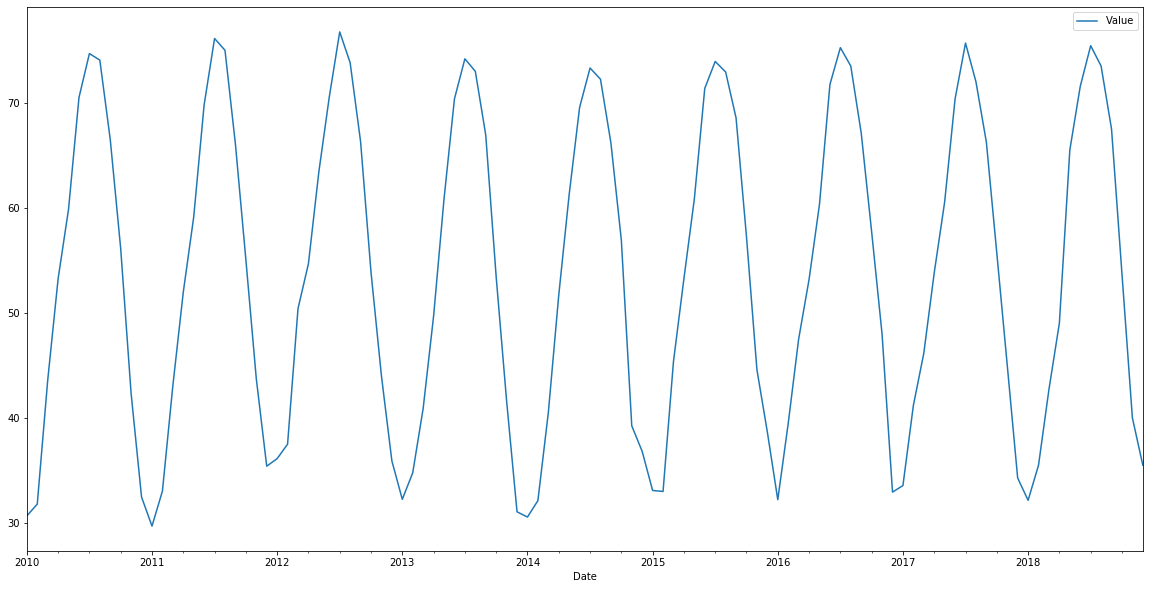

In [12]:
temp_df.plot(kind='line',  y='Value', figsize=(20,10));

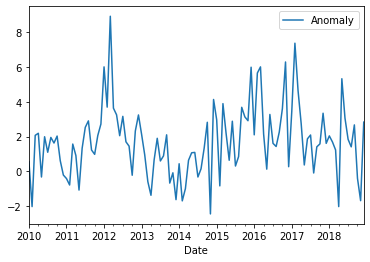

In [13]:
temp_df.plot(kind='line', y='Anomaly');

In [14]:
temp_df = temp_df.asfreq('D')

In [15]:
temp_df

,Value,Anomaly
Date,,
2010-01-01,30.671875,0.549805
2010-01-02,NaN,NaN
2010-01-03,NaN,NaN
2010-01-04,NaN,NaN
2010-01-05,NaN,NaN
...,...,...
2018-11-27,NaN,NaN
2018-11-28,NaN,NaN
2018-11-29,NaN,NaN


In [16]:
temp_df = temp_df.interpolate(method='time')

In [17]:
temp_df

,Value,Anomaly
Date,,
2010-01-01,30.671875,0.549805
2010-01-02,30.703125,0.467041
2010-01-03,30.750000,0.384033
2010-01-04,30.781250,0.301270
2010-01-05,30.812500,0.218262
...,...,...
2018-11-27,36.093750,2.228516
2018-11-28,35.937500,2.378906
2018-11-29,35.812500,2.529297


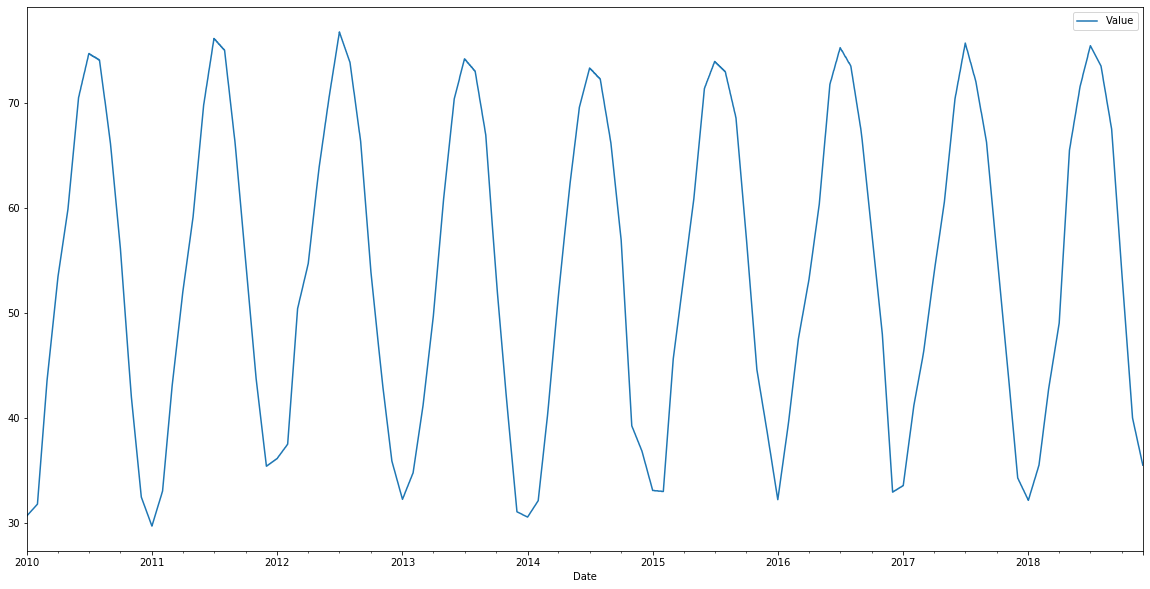

In [19]:
temp_df.plot(kind='line',  y='Value', figsize=(20,10));

In [21]:
temp_df.to_csv(path/'weather_2010_2020.csv')

In [24]:
!ls -latr {path}

total 132
-rw-r--r-- 1 root root   290 May 19 20:17 110-tavg-1-1-2010-2018.csv
-rw-r--r-- 1 root root   294 May 19 20:18 110-tavg-1-2-2010-2018.csv
-rw-r--r-- 1 root root   289 May 19 20:18 110-tavg-1-3-2010-2018.csv
-rw-r--r-- 1 root root   287 May 19 20:18 110-tavg-1-5-2010-2018.csv
-rw-r--r-- 1 root root   289 May 19 20:18 110-tavg-1-4-2010-2018.csv
-rw-r--r-- 1 root root   286 May 19 20:19 110-tavg-1-6-2010-2018.csv
-rw-r--r-- 1 root root   287 May 19 20:19 110-tavg-1-7-2010-2018.csv
-rw-r--r-- 1 root root   289 May 19 20:19 110-tavg-1-8-2010-2018.csv
-rw-r--r-- 1 root root   291 May 19 20:19 110-tavg-1-9-2010-2018.csv
-rw-r--r-- 1 root root   292 May 19 20:19 110-tavg-1-10-2010-2018.csv
-rw-r--r-- 1 root root   293 May 19 20:19 110-tavg-1-11-2010-2018.csv
-rw-r--r-- 1 root root   292 May 19 20:19 110-tavg-1-12-2010-2018.csv
drwxr-xr-x 3 root root  4096 May 19 21:04 ..
drwxr-xr-x 2 root root  4096 May 20 10:46 .
-rw-r--r-- 1 root root 74226 May 20 10:46 weather_2010_2020.csv


In [32]:
!head -n 1000 {path/'weather_2010_2020.csv'}

Date,Value,Anomaly
2010-01-01,30.67,0.55
2010-01-02,30.7,0.467
2010-01-03,30.75,0.384
2010-01-04,30.78,0.3013
2010-01-05,30.81,0.2183
2010-01-06,30.86,0.1354
2010-01-07,30.89,0.05252
2010-01-08,30.92,-0.03036
2010-01-09,30.97,-0.1132
2010-01-10,31.0,-0.1962
2010-01-11,31.03,-0.279
2010-01-12,31.08,-0.3618
2010-01-13,31.11,-0.4448
2010-01-14,31.14,-0.528
2010-01-15,31.19,-0.6104
2010-01-16,31.22,-0.6934
2010-01-17,31.25,-0.7764
2010-01-18,31.28,-0.8594
2010-01-19,31.33,-0.942
2010-01-20,31.36,-1.025
2010-01-21,31.39,-1.107
2010-01-22,31.44,-1.19
2010-01-23,31.47,-1.273
2010-01-24,31.5,-1.356
2010-01-25,31.55,-1.439
2010-01-26,31.58,-1.522
2010-01-27,31.61,-1.605
2010-01-28,31.66,-1.688
2010-01-29,31.69,-1.7705
2010-01-30,31.72,-1.854
2010-01-31,31.77,-1.937
2010-02-01,31.8,-2.02
2010-02-02,32.22,-1.873
2010-02-03,32.62,-1.728
2010-02-04,33.06,-1.581
2010-02-05,33.47,-1.436
2010-02-06,33.9,-1.289
2010-02-07,34.3,-1.144
2010-02-08,34.75,-0.997
2010-02-09,35.16,-0.851
2010-02-10,35.6,-0.70